## Import necessary libraries

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## Load & Explore data

In [104]:
data=pd.read_csv('D:/Projects/CodeSoft/Data Science Internship/Titanic Analysis/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
# To show basic info about datatype
data.info()
shape = data.shape
print(f'\n Number of Rows = {shape[0]}\n Number of columns = {shape[1]} ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 Number of Rows = 891
 Number of columns = 12 


In [106]:
# Check for null values 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
data = data.drop(columns='Cabin', axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [110]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [111]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [112]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Analysis

In [113]:
mapping = {
    0: 'Not Survived',
    1: 'Survived'}
df = data.copy()
df['Survived'] = df['Survived'].map(mapping)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Not Survived,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,Not Survived,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,Not Survived,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,Not Survived,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,Not Survived,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,Survived,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,Survived,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


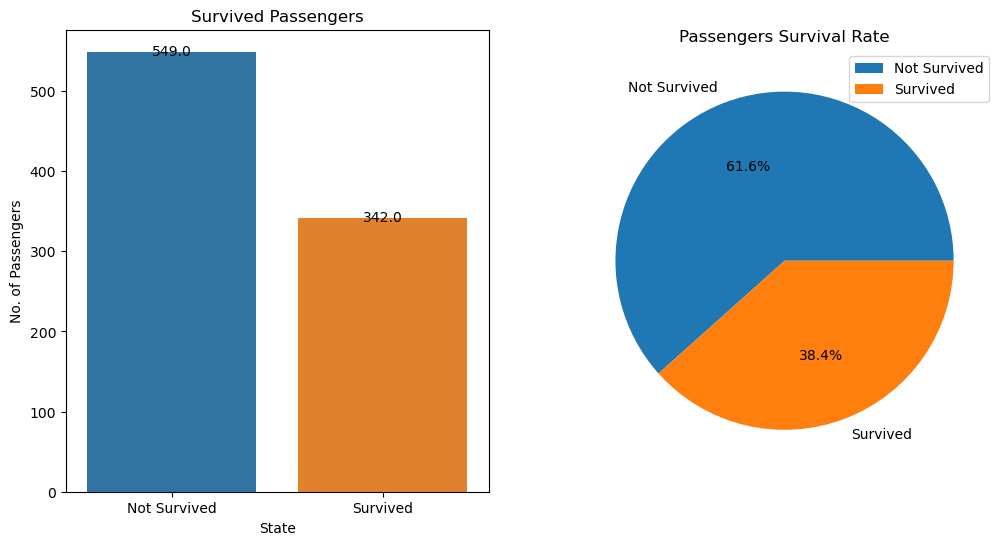

In [114]:
survived_counts = df['Survived'].value_counts()
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df, x='Survived', ax=ax[0])
ax[0].set_xlabel('State')
ax[0].set_ylabel('No. of Passengers')
ax[0].set_title('Survived Passengers')
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')


ax[1].pie(survived_counts, labels=survived_counts.index,autopct='%1.1f%%')
ax[1].legend(labels=df['Survived'], loc='upper right')
ax[1].set_title('Passengers Survival Rate')

plt.show()

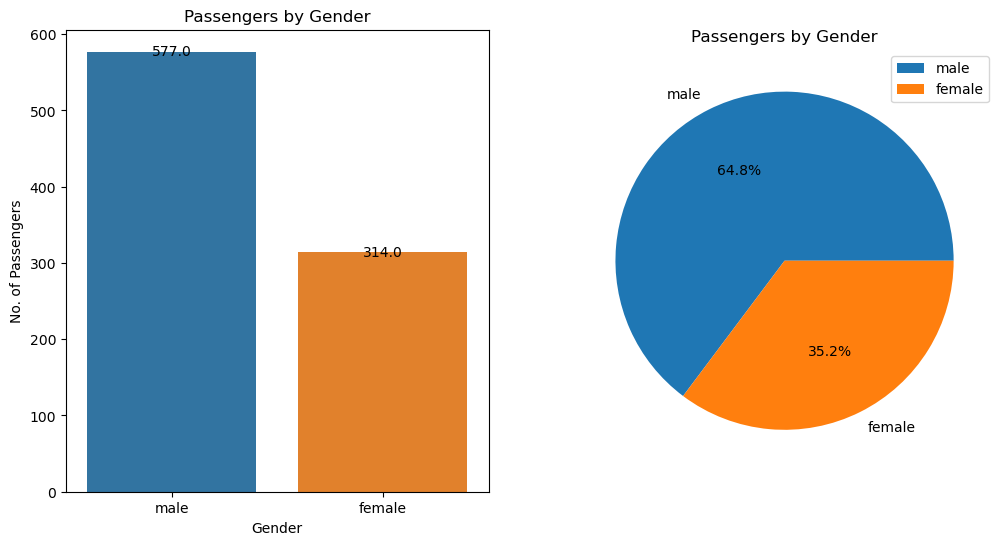

In [115]:
gender_counts = df['Sex'].value_counts()
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df, x='Sex', ax=ax[0])
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('No. of Passengers')
ax[0].set_title('Passengers by Gender')
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')


ax[1].pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%')
ax[1].legend(labels=df['Sex'], loc='upper right')
ax[1].set_title('Passengers by Gender')

plt.show()

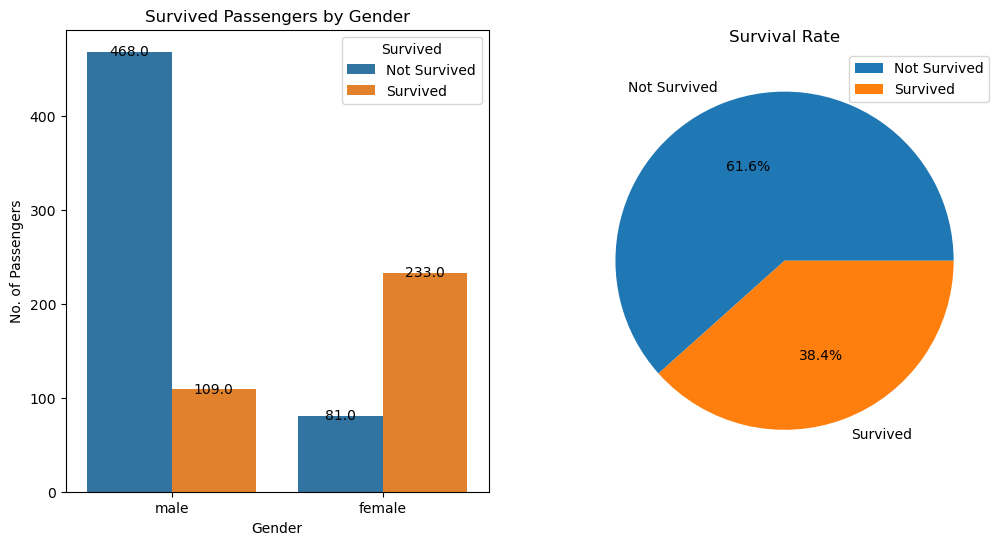

In [119]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[0])
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('No. of Passengers')
ax[0].set_title('Survived Passengers by Gender')
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

survived_counts = df['Survived'].value_counts()
ax[1].pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
ax[1].legend(labels=df['Survived'], loc='upper right')
ax[1].set_title('Survival Rate')

plt.show()

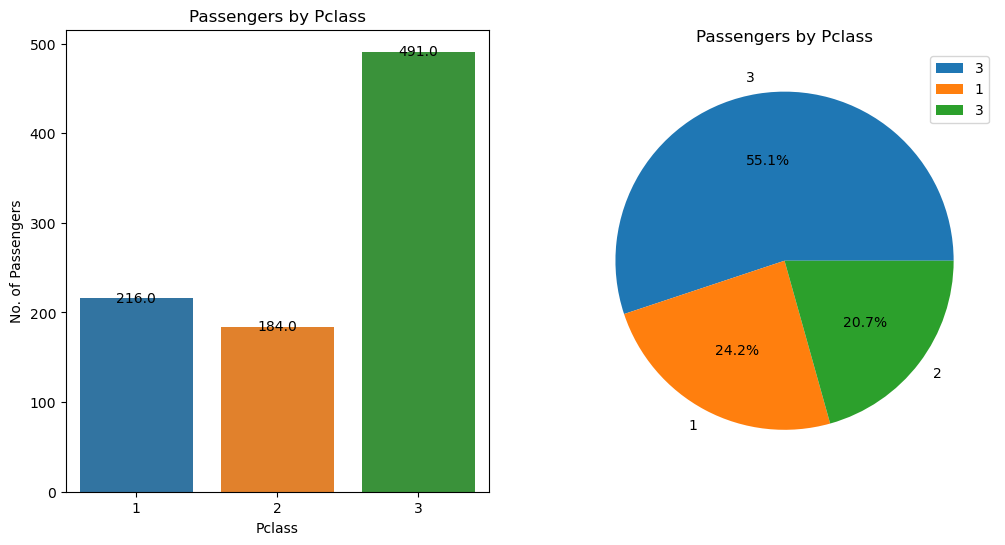

In [120]:
Pclass_counts = df['Pclass'].value_counts()
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df, x='Pclass', ax=ax[0])
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('No. of Passengers')
ax[0].set_title('Passengers by Pclass')
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

ax[1].pie(Pclass_counts, labels=Pclass_counts.index,autopct='%1.1f%%')
ax[1].legend(labels=df['Pclass'], loc='upper right')
ax[1].set_title('Passengers by Pclass')

plt.show()

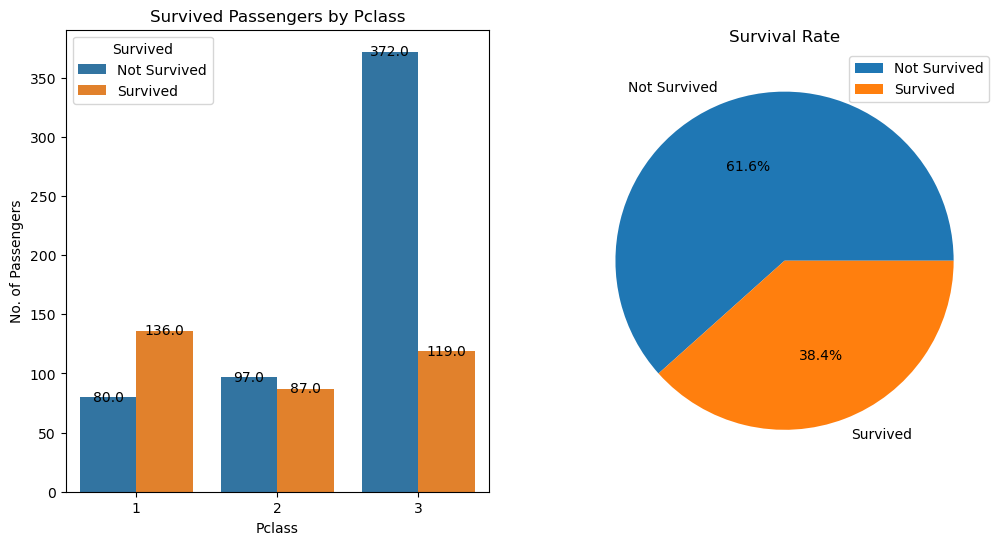

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax[0])
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('No. of Passengers')
ax[0].set_title('Survived Passengers by Pclass')
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

survived_counts = df['Survived'].value_counts()
ax[1].pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
ax[1].legend(labels=df['Survived'], loc='upper right')
ax[1].set_title('Survival Rate')

plt.show()

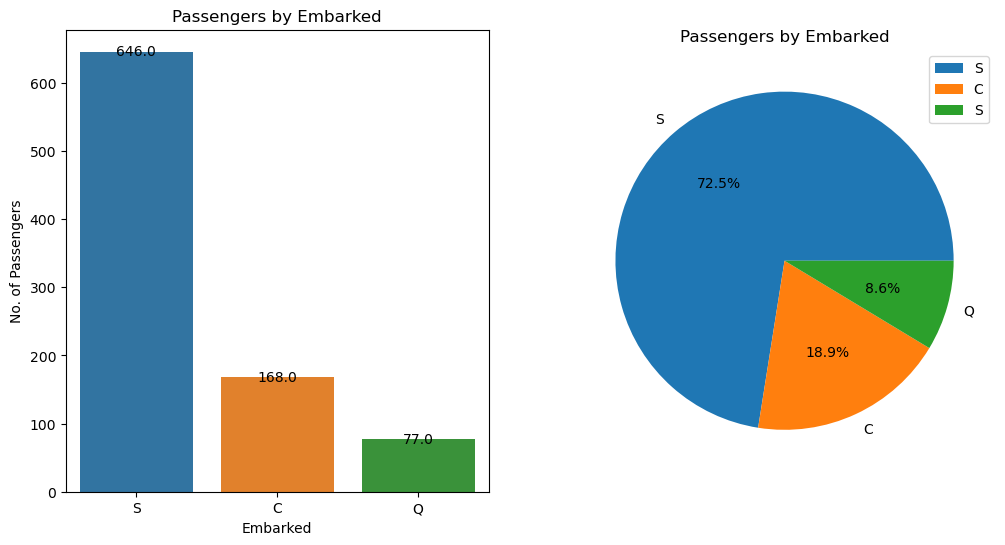

In [122]:
Embarked_counts = df['Embarked'].value_counts()
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df, x='Embarked', ax=ax[0])
ax[0].set_xlabel('Embarked')
ax[0].set_ylabel('No. of Passengers')
ax[0].set_title('Passengers by Embarked')
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

ax[1].pie(Embarked_counts, labels=Embarked_counts.index,autopct='%1.1f%%')
ax[1].legend(labels=df['Embarked'], loc='upper right')
ax[1].set_title('Passengers by Embarked')

plt.show()

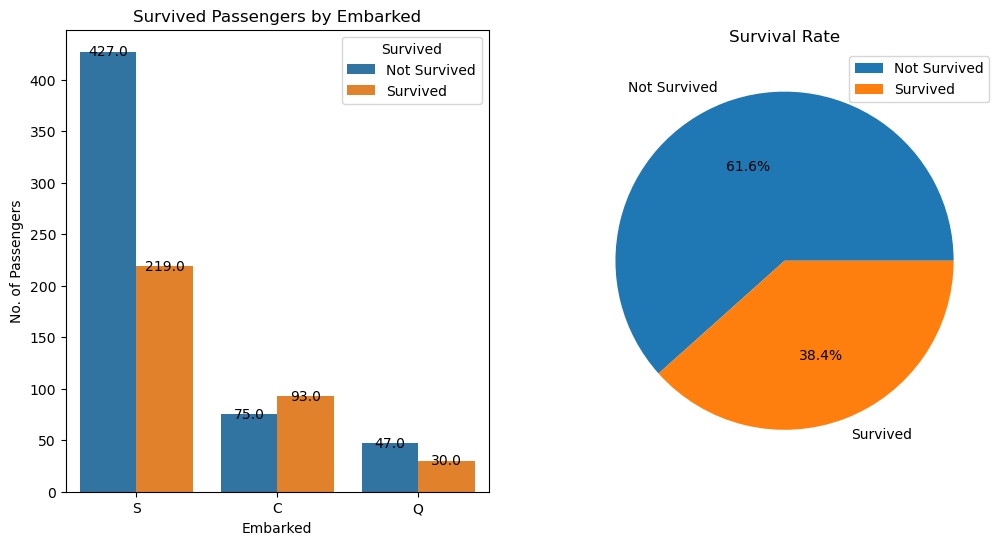

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='Embarked', hue='Survived', data=df, ax=ax[0])
ax[0].set_xlabel('Embarked')
ax[0].set_ylabel('No. of Passengers')
ax[0].set_title('Survived Passengers by Embarked')
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

survived_counts = df['Survived'].value_counts()
ax[1].pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
ax[1].legend(labels=df['Survived'], loc='upper right')
ax[1].set_title('Survival Rate')

plt.show()

## Encoding the Categorical columns

In [124]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [125]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [126]:
data.replace({'Sex':{'male':0, 'female':1},  'Embarked':{'S':0, 'C':1, 'Q':2}},inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,1


## Coorelation Matrix

In [179]:
cor = data.drop(columns = ['Ticket','PassengerId','Name','Sex','Embarked'],axis=1)
corr = cor.corr()

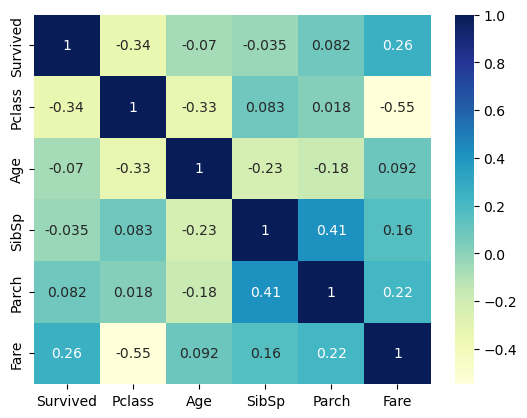

In [181]:
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

## Features and Target Data

In [127]:
x = data.drop(columns = ['Ticket','PassengerId','Name','Survived'],axis=1)
y = data['Survived']

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 100)

## Model Training

In [167]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [168]:
# logistic Regression Model
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [172]:
x_train_pre = model.predict(x_train_scaled)
train_data_accur = accuracy_score(y_train, x_train_pre)
print('Accuracy of Train Data: ', train_data_accur * 100, '%')

Accuracy of Train Data:  81.38041733547352 %


In [173]:
x_test_pre = model.predict(x_test_scaled)
test_data_accur = accuracy_score(y_test, x_test_pre)
print('Accuracy of Test Data: ', test_data_accur * 100, '%')

Accuracy of Test Data:  78.73134328358209 %


In [184]:
# Random Forest Model
model = RandomForestClassifier()
model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [185]:
x_train_pre = model.predict(x_train_scaled)
train_data_accur = accuracy_score(y_train, x_train_pre)
print('Accuracy of Train Data: ', train_data_accur * 100, '%')

Accuracy of Train Data:  98.87640449438202 %


In [186]:
x_test_pre = model.predict(x_test_scaled)
test_data_accur = accuracy_score(y_test, x_test_pre)
print('Accuracy of Test Data: ', test_data_accur * 100, '%')

Accuracy of Test Data:  82.08955223880598 %
